#What is RAG?
- LLM은 강력하지만 2가지 한계가 있다
    1. 유한한 컨텍스트 : 한 번에 모든 데이터를 입력 받을 수 없다.
    2. 정적인 지식 : 학습 데이터가 특정 시점에 고정되어 있다.

- RAG (Retrieval-Agumented Generation) : 검색 증강 생성
    - 작동 방식 : Question -> Retrieve -> Prompt -> LLM -> Answer
    - RAG 시스템 구축 순서
        1. Load
        2. Split
        3. Embed
        4. Store
    

## Load
- RAG 시스템 구축을 위한 첫 번째 단계
- 다양한 데이터 소스(PDF, CSV, Google Drive 등)를 LangChain에서 작업할 수 있는 Document 객체로 전환하는 단계

### PDFPlumber

https://docs.langchain.com/oss/python/integrations/document_loaders/pdfplumber

- C 언어 기반 -> 매우 빠름
- 대량의 문서, 단순 텍스트 추출에 유리

In [ ]:
!pip install -qU langchain-community pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 1.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [ ]:
# init
from langchain_community.document_loaders import PDFPlumberLoader

loader = PDFPlumberLoader("/content/ARK_INNOVATION_ETF_ARKK_HOLDINGS.pdf")

In [ ]:
# load
docs = loader.load()
docs

[Document(metadata={'source': '/content/ARK_INNOVATION_ETF_ARKK_HOLDINGS.pdf', 'file_path': '/content/ARK_INNOVATION_ETF_ARKK_HOLDINGS.pdf', 'page': 0, 'total_pages': 3, 'Keywords': 'HD:2025-11-26', 'CreationDate': "D:20251126070539+00'00'", 'ModDate': "D:20251126070539+00'00'"}, page_content='Holdings Data - ARKK\nAs of 11/26/2025\nARKK\nARK Innovation ETF\nCompany Ticker CUSIP Shares Market Value ($) Weight (%)\n1 TESLA INC TSLA 88160R101 2,204,438 $924,541,297.20 12.26%\n2 TEMPUS AI INC TEM 88023B103 5,465,331 $419,956,034.04 5.57%\n3 ROKU INC ROKU 77543R102 4,347,025 $412,445,732.00 5.47%\n4 CRISPR THERAPEUTICS AG CRSP H17182108 7,625,349 $408,489,945.93 5.42%\n5 COINBASE GLOBAL INC -CLASS A COIN 19260Q107 1,542,644 $392,016,693.28 5.20%\n6 SHOPIFY INC - CLASS A SHOP 82509L107 2,415,270 $380,091,039.90 5.04%\n7 ROBINHOOD MARKETS INC - A HOOD 770700102 2,751,983 $318,046,675.31 4.22%\n8 ROBLOX CORP -CLASS A RBLX 771049103 3,142,157 $286,156,237.99 3.79%\n9 PALANTIR TECHNOLOGIES INC-

In [ ]:
len(docs)

3

In [ ]:
import pprint

pprint.pp(docs[0].metadata)

{'source': '/content/ARK_INNOVATION_ETF_ARKK_HOLDINGS.pdf',
 'file_path': '/content/ARK_INNOVATION_ETF_ARKK_HOLDINGS.pdf',
 'page': 0,
 'total_pages': 3,
 'Keywords': 'HD:2025-11-26',
 'CreationDate': "D:20251126070539+00'00'",
 'ModDate': "D:20251126070539+00'00'"}


In [ ]:
print(docs[0].page_content[:100])

Holdings Data - ARKK
As of 11/26/2025
ARKK
ARK Innovation ETF
Company Ticker CUSIP Shares Market Val


In [ ]:
print(docs[0].page_content[:500])

Holdings Data - ARKK
As of 11/26/2025
ARKK
ARK Innovation ETF
Company Ticker CUSIP Shares Market Value ($) Weight (%)
1 TESLA INC TSLA 88160R101 2,204,438 $924,541,297.20 12.26%
2 TEMPUS AI INC TEM 88023B103 5,465,331 $419,956,034.04 5.57%
3 ROKU INC ROKU 77543R102 4,347,025 $412,445,732.00 5.47%
4 CRISPR THERAPEUTICS AG CRSP H17182108 7,625,349 $408,489,945.93 5.42%
5 COINBASE GLOBAL INC -CLASS A COIN 19260Q107 1,542,644 $392,016,693.28 5.20%
6 SHOPIFY INC - CLASS A SHOP 82509L107 2,415,270 $38


### PyMUPDF

https://docs.langchain.com/oss/python/integrations/document_loaders/pymupdf
- Python 기반
- 표 추출에 유리, 더 많은 Metadata 제공
- 논문, 재무제표, 표가 많은 문서, 정밀 분석에 유리

In [ ]:
!pip install -qU pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 96.3 MB/s eta 0:00:00


In [ ]:
from langchain_community.document_loaders import PyMuPDFLoader

file_path = "/content/ARK_INNOVATION_ETF_ARKK_HOLDINGS.pdf"
loader = PyMuPDFLoader(file_path)

In [ ]:
docs = loader.load()
docs[0]

Document(metadata={'producer': '', 'creator': '', 'creationdate': '2025-11-26T07:05:39+00:00', 'source': '/content/ARK_INNOVATION_ETF_ARKK_HOLDINGS.pdf', 'file_path': '/content/ARK_INNOVATION_ETF_ARKK_HOLDINGS.pdf', 'total_pages': 3, 'format': 'PDF 1.4', 'title': '', 'author': '', 'subject': '', 'keywords': 'HD:2025-11-26', 'moddate': '2025-11-26T07:05:39+00:00', 'trapped': '', 'modDate': "D:20251126070539+00'00'", 'creationDate': "D:20251126070539+00'00'", 'page': 0}, page_content='Holdings Data - ARKK\nAs of 11/26/2025\nARKK\nARK Innovation ETF\nCompany\nTicker\nCUSIP\nShares\nMarket Value ($)\nWeight (%)\n1\nTESLA INC\nTSLA\n88160R101\n2,204,438\n$924,541,297.20\n12.26%\n2\nTEMPUS AI INC\nTEM\n88023B103\n5,465,331\n$419,956,034.04\n5.57%\n3\nROKU INC\nROKU\n77543R102\n4,347,025\n$412,445,732.00\n5.47%\n4\nCRISPR THERAPEUTICS AG\nCRSP\nH17182108\n7,625,349\n$408,489,945.93\n5.42%\n5\nCOINBASE GLOBAL INC -CLASS A\nCOIN\n19260Q107\n1,542,644\n$392,016,693.28\n5.20%\n6\nSHOPIFY INC - CL

In [ ]:
len(docs)

3

In [ ]:
import pprint

pprint.pp(docs[0].metadata)

{'producer': '',
 'creator': '',
 'creationdate': '2025-11-26T07:05:39+00:00',
 'source': '/content/ARK_INNOVATION_ETF_ARKK_HOLDINGS.pdf',
 'file_path': '/content/ARK_INNOVATION_ETF_ARKK_HOLDINGS.pdf',
 'total_pages': 3,
 'format': 'PDF 1.4',
 'title': '',
 'author': '',
 'subject': '',
 'keywords': 'HD:2025-11-26',
 'moddate': '2025-11-26T07:05:39+00:00',
 'trapped': '',
 'modDate': "D:20251126070539+00'00'",
 'creationDate': "D:20251126070539+00'00'",
 'page': 0}


In [ ]:
print(docs[0].page_content[:100])

Holdings Data - ARKK
As of 11/26/2025
ARKK
ARK Innovation ETF
Company
Ticker
CUSIP
Shares
Market Val


## Split (Chunking)
- RAG 시스템 구축을 위한 두 번째 단계
- Document 객체를 작은 말뭉치(Chunk)로 전환하는 단계
    - LLM의 Context Window 사이즈 한계

- RecursiveCharacterTextSplitter : 재귀적 문자 텍스트 분할기
    - 큰 단위에서 작은 단위로 순차적으로 내려가면서 쪼개는 방식
        - \n\n (문단 바꿈 : 가장 큰 단위)
        - \n (줄 바꿈)
        - (공백 / 띄어쓰기)
        - "" (글자 단위 : 가장 작은 단위)
    - 문맥을 최대한 보존할 수 있음
    - split_texts : 문자열을 청킹할 때 사용
    - split_documents : Document 객체 리스트를 청킹할 때 사용


In [ ]:
# 테스트 텍스트
sample_text = """인공지능(AI) 기술은 지난 몇 년간 급격하게 발전했습니다. 특히 OpenAI의 GPT 시리즈와 같은 대규모 언어 모델(LLM)은 자연어 처리 분야에서 혁신을 일으켰습니다.

하지만 LLM에게는 명확한 한계가 존재합니다.
첫째, 학습 데이터가 특정 시점에 고정되어 있어 최신 정보를 알지 못합니다.
둘째, 모델이 한 번에 처리할 수 있는 입력 토큰의 수(Context Window)에 제한이 있습니다.
이러한 문제를 해결하기 위해 등장한 것이 바로 RAG(검색 증강 생성) 기술입니다.

RAG 시스템의 핵심 프로세스는 다음과 같습니다:
1. 데이터 로드 (Loading)
2. 텍스트 분할 (Splitting)
3. 임베딩 및 저장 (Embedding & Storage)
4. 검색 및 답변 생성 (Retrieval & Generation)

텍스트 분할은 매우 중요합니다. RecursiveCharacterTextSplitter는문단이너무길경우줄바꿈으로자르고줄바꿈도없으면공백으로자르고공백도없으면결국글자단위로자르게됩니다.이문장은공백이거의없어서글자단위분할테스트에적합합니다."""

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

# 분할기 설정
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 100,
    chunk_overlap = 0,

)

recursive_text = text_splitter.split_text(sample_text)

In [ ]:
# 결과 출력
print(f"총 청크 개수: {len(recursive_text)}\n")
for i, doc in enumerate(recursive_text):
    print(f"--- Chunk {i+1} ({len(doc)}자) ---")
    print(doc)
    print()

총 청크 개수: 9

--- Chunk 1 (96자) ---
인공지능(AI) 기술은 지난 몇 년간 급격하게 발전했습니다. 특히 OpenAI의 GPT 시리즈와 같은 대규모 언어 모델(LLM)은 자연어 처리 분야에서 혁신을 일으켰습니다.

--- Chunk 2 (68자) ---
하지만 LLM에게는 명확한 한계가 존재합니다.
첫째, 학습 데이터가 특정 시점에 고정되어 있어 최신 정보를 알지 못합니다.

--- Chunk 3 (57자) ---
둘째, 모델이 한 번에 처리할 수 있는 입력 토큰의 수(Context Window)에 제한이 있습니다.

--- Chunk 4 (46자) ---
이러한 문제를 해결하기 위해 등장한 것이 바로 RAG(검색 증강 생성) 기술입니다.

--- Chunk 5 (69자) ---
RAG 시스템의 핵심 프로세스는 다음과 같습니다:
1. 데이터 로드 (Loading)
2. 텍스트 분할 (Splitting)

--- Chunk 6 (72자) ---
3. 임베딩 및 저장 (Embedding & Storage)
4. 검색 및 답변 생성 (Retrieval & Generation)

--- Chunk 7 (17자) ---
텍스트 분할은 매우 중요합니다.

--- Chunk 8 (99자) ---
RecursiveCharacterTextSplitter는문단이너무길경우줄바꿈으로자르고줄바꿈도없으면공백으로자르고공백도없으면결국글자단위로자르게됩니다.이문장은공백이거의없어서글자단위분할

--- Chunk 9 (10자) ---
테스트에적합합니다.



In [ ]:
from langchain_text_splitters import CharacterTextSplitter

char_splitter = CharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=0,
    separator=""
)

char_docs = char_splitter.split_text(sample_text)

# 결과 출력
print(f"총 청크 개수: {len(char_docs)}\n")
for i, doc in enumerate(char_docs):
    print(f"--- Chunk {i+1} ({len(doc)}자) ---")
    print(doc)
    print()

총 청크 개수: 6

--- Chunk 1 (100자) ---
인공지능(AI) 기술은 지난 몇 년간 급격하게 발전했습니다. 특히 OpenAI의 GPT 시리즈와 같은 대규모 언어 모델(LLM)은 자연어 처리 분야에서 혁신을 일으켰습니다.

하지

--- Chunk 2 (100자) ---
만 LLM에게는 명확한 한계가 존재합니다.
첫째, 학습 데이터가 특정 시점에 고정되어 있어 최신 정보를 알지 못합니다.
둘째, 모델이 한 번에 처리할 수 있는 입력 토큰의 수(Co

--- Chunk 3 (100자) ---
ntext Window)에 제한이 있습니다.
이러한 문제를 해결하기 위해 등장한 것이 바로 RAG(검색 증강 생성) 기술입니다.

RAG 시스템의 핵심 프로세스는 다음과 같습니다:

--- Chunk 4 (99자) ---
1. 데이터 로드 (Loading)
2. 텍스트 분할 (Splitting)
3. 임베딩 및 저장 (Embedding & Storage)
4. 검색 및 답변 생성 (Retrieva

--- Chunk 5 (100자) ---
l & Generation)

텍스트 분할은 매우 중요합니다. RecursiveCharacterTextSplitter는문단이너무길경우줄바꿈으로자르고줄바꿈도없으면공백으로자르고공백도없

--- Chunk 6 (44자) ---
으면결국글자단위로자르게됩니다.이문장은공백이거의없어서글자단위분할테스트에적합합니다.



#### Load - Split

In [ ]:
from langchain_community.document_loaders import PDFPlumberLoader

file_path = "/content/ARK_INNOVATION_ETF_ARKK_HOLDINGS.pdf"
loader = PDFPlumberLoader(file_path)

In [ ]:
docs = loader.load()

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 300,
    chunk_overlap = 0,
)

recursive_docs = text_splitter.split_documents(docs)

In [ ]:
recursive_docs

[Document(metadata={'source': '/content/ARK_INNOVATION_ETF_ARKK_HOLDINGS.pdf', 'file_path': '/content/ARK_INNOVATION_ETF_ARKK_HOLDINGS.pdf', 'page': 0, 'total_pages': 3, 'Keywords': 'HD:2025-11-26', 'CreationDate': "D:20251126070539+00'00'", 'ModDate': "D:20251126070539+00'00'"}, page_content='Holdings Data - ARKK\nAs of 11/26/2025\nARKK\nARK Innovation ETF\nCompany Ticker CUSIP Shares Market Value ($) Weight (%)\n1 TESLA INC TSLA 88160R101 2,204,438 $924,541,297.20 12.26%\n2 TEMPUS AI INC TEM 88023B103 5,465,331 $419,956,034.04 5.57%\n3 ROKU INC ROKU 77543R102 4,347,025 $412,445,732.00 5.47%'),
 Document(metadata={'source': '/content/ARK_INNOVATION_ETF_ARKK_HOLDINGS.pdf', 'file_path': '/content/ARK_INNOVATION_ETF_ARKK_HOLDINGS.pdf', 'page': 0, 'total_pages': 3, 'Keywords': 'HD:2025-11-26', 'CreationDate': "D:20251126070539+00'00'", 'ModDate': "D:20251126070539+00'00'"}, page_content='4 CRISPR THERAPEUTICS AG CRSP H17182108 7,625,349 $408,489,945.93 5.42%\n5 COINBASE GLOBAL INC -CLASS 

In [ ]:
len(recursive_docs)

25

In [ ]:
recursive_docs[0].page_content

'Holdings Data - ARKK\nAs of 11/26/2025\nARKK\nARK Innovation ETF\nCompany Ticker CUSIP Shares Market Value ($) Weight (%)\n1 TESLA INC TSLA 88160R101 2,204,438 $924,541,297.20 12.26%\n2 TEMPUS AI INC TEM 88023B103 5,465,331 $419,956,034.04 5.57%\n3 ROKU INC ROKU 77543R102 4,347,025 $412,445,732.00 5.47%'

In [ ]:
len(recursive_docs[0].page_content)

297

## Embed
- RAG 시스템 구축을 위한 세 번째 단계
- 작은 말뭉치를 고정된 길이의 숫자로 변환(Vectorizing)하는 단계
    - 이후 유사도 검색을 위함
- 임베딩 / 벡터라이징
    - 텍스트, 이미지 등을 컴퓨터가 이해하고 계산할 수 있는 숫자들로 바꾸는 과정

In [ ]:
!pip install -qU "langchain[openai]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 3.1 MB/s eta 0:00:00


In [ ]:
import os
from langchain.chat_models import init_chat_model

os.environ.setdefault("OPENAI_API_KEY", "DUMMY_KEY")

- OpenAI Embedding 모델 + 캐싱
    - 한 번 임베딩한 텍스트 결과는 로컬 파일에 저장 -> 똑같은 텍스트가 들어오면 API 호출 대신 저장된 파일을 씀

In [ ]:
from langchain_openai import OpenAIEmbeddings
from langchain_classic.embeddings import CacheBackedEmbeddings
from langchain_classic.storage import LocalFileStore

# 실제 계산을 담당할 핵심 임베딩 모델
underlying_embeddings = OpenAIEmbeddings(model = "text-embedding-3-small")

# 캐시 데이터를 저장할 물리적 위치
store = LocalFileStore("./cache")

# 캐시 지원 임베딩 래퍼(Wrapper) 생성
cached_embedder = CacheBackedEmbeddings.from_bytes_store(
    underlying_embeddings,                 # 실제 임베딩을 수행할 모델 객체
    store,                                 # 결과를 저장하고 불러올 저장소 객체
    namespace=underlying_embeddings.model, # 충돌 방지용 이름표
)


/usr/local/lib/python3.12/dist-packages/langchain_classic/embeddings/cache.py:58: UserWarning: Using default key encoder: SHA-1 is *not* collision-resistant. While acceptable for most cache scenarios, a motivated attacker can craft two different payloads that map to the same cache key. If that risk matters in your environment, supply a stronger encoder (e.g. SHA-256 or BLAKE2) via the `key_encoder` argument. If you change the key encoder, consider also creating a new cache, to avoid (the potential for) collisions with existing keys.
  _warn_about_sha1_encoder()


In [ ]:
from langchain_core.vectorstores import InMemoryVectorStore

vectorstore = InMemoryVectorStore.from_documents(
    documents=recursive_docs,
    embedding=cached_embedder
)

In [ ]:
query = "Tesla 투자 비중이 얼마나 되나요?"
results = vectorstore.similarity_search(query)

In [ ]:
results

[Document(id='0672deda-ef17-4dc6-964a-712792b99519', metadata={'source': '/content/ARK_INNOVATION_ETF_ARKK_HOLDINGS.pdf', 'file_path': '/content/ARK_INNOVATION_ETF_ARKK_HOLDINGS.pdf', 'page': 0, 'total_pages': 3, 'Keywords': 'HD:2025-11-26', 'CreationDate': "D:20251126070539+00'00'", 'ModDate': "D:20251126070539+00'00'"}, page_content='Holdings Data - ARKK\nAs of 11/26/2025\nARKK\nARK Innovation ETF\nCompany Ticker CUSIP Shares Market Value ($) Weight (%)\n1 TESLA INC TSLA 88160R101 2,204,438 $924,541,297.20 12.26%\n2 TEMPUS AI INC TEM 88023B103 5,465,331 $419,956,034.04 5.57%\n3 ROKU INC ROKU 77543R102 4,347,025 $412,445,732.00 5.47%'),
 Document(id='a2979e82-527d-470a-ac29-9fde616910ee', metadata={'source': '/content/ARK_INNOVATION_ETF_ARKK_HOLDINGS.pdf', 'file_path': '/content/ARK_INNOVATION_ETF_ARKK_HOLDINGS.pdf', 'page': 1, 'total_pages': 3, 'Keywords': 'HD:2025-11-26', 'CreationDate': "D:20251126070539+00'00'", 'ModDate': "D:20251126070539+00'00'"}, page_content='Holdings Data - 

In [ ]:
print(f"검색된 문서 내용:\n{results[0].page_content}")

검색된 문서 내용:
Holdings Data - ARKK
As of 11/26/2025
ARKK
ARK Innovation ETF
Company Ticker CUSIP Shares Market Value ($) Weight (%)
1 TESLA INC TSLA 88160R101 2,204,438 $924,541,297.20 12.26%
2 TEMPUS AI INC TEM 88023B103 5,465,331 $419,956,034.04 5.57%
3 ROKU INC ROKU 77543R102 4,347,025 $412,445,732.00 5.47%


## Store
- RAG 시스템 구축을 위한 네 번째 단계
- 임베딩한 결과를 저장하는 단계
    - DB 구축 단계


In [ ]:
!pip install -qU "langchain-chroma>=0.1.2"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.0/220.0 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46

- Chroma DB
    - 벡터로 전환한 데이터를 파일 형태로 저장 -> 컴퓨터를 껐다 켜도 데이터 보존

In [ ]:
from langchain_chroma import Chroma

# 1. DB 경로 설정
CHROMA_PATH = "./chroma_db"

# 2. Store 생성
db = Chroma.from_documents(
    documents = recursive_docs,
    embedding = cached_embedder,
    persist_directory = CHROMA_PATH,
    collection_name = "rag_collection"
 )

In [ ]:
results = db.similarity_search(query, k = 1)

In [ ]:
len(results)

1

In [ ]:
print(f"검색된 문서 내용:\n{results[0].page_content}")

검색된 문서 내용:
Holdings Data - ARKK
As of 11/26/2025
ARKK
ARK Innovation ETF
Company Ticker CUSIP Shares Market Value ($) Weight (%)
1 TESLA INC TSLA 88160R101 2,204,438 $924,541,297.20 12.26%
2 TEMPUS AI INC TEM 88023B103 5,465,331 $419,956,034.04 5.57%
3 ROKU INC ROKU 77543R102 4,347,025 $412,445,732.00 5.47%


## Retrieve
- 유사도 측정
    - 코사인 유사도 (Cosine Similarity)
        - 두 벡터 사이의 각도 계산정
            - 코사인 유사도 (Cosine Similarity)
                    - 두 벡터 사이의 각도 계산
                    - 벡터의 크기는 무시하고, 방향이 얼마나 비슷한지 계산
            - 유클리드 거리 (Euclidean Distance)
                - 두 점 사이의 직선거리 (L2 Distance) 계산
                - 거리가 가까울수록 유사
            - 내적 (Dot Product)
                - 한 벡터를 다른 벡터에 투영했을 때의 길이 곱
                - 방향과 크기를 모두 고려
    
#  
- 검색기 생성
    - as_retriever() 메서드로 Vector Store 기반 검색기 생성 -> invoke() 메서드로 실행
    - type으로 threshold 및 mmr(Maximal Marginal Relevance) 설정

- MMR (Maximal Marginal Relevance)
    - 가장 "비슷한" 것만 찾으면 똑같은 내용의 문장만 3개 나올 수 있음
    - MMR은 "관련 있으면서도 서로 다른(다양한)" 내용을 찾아줌

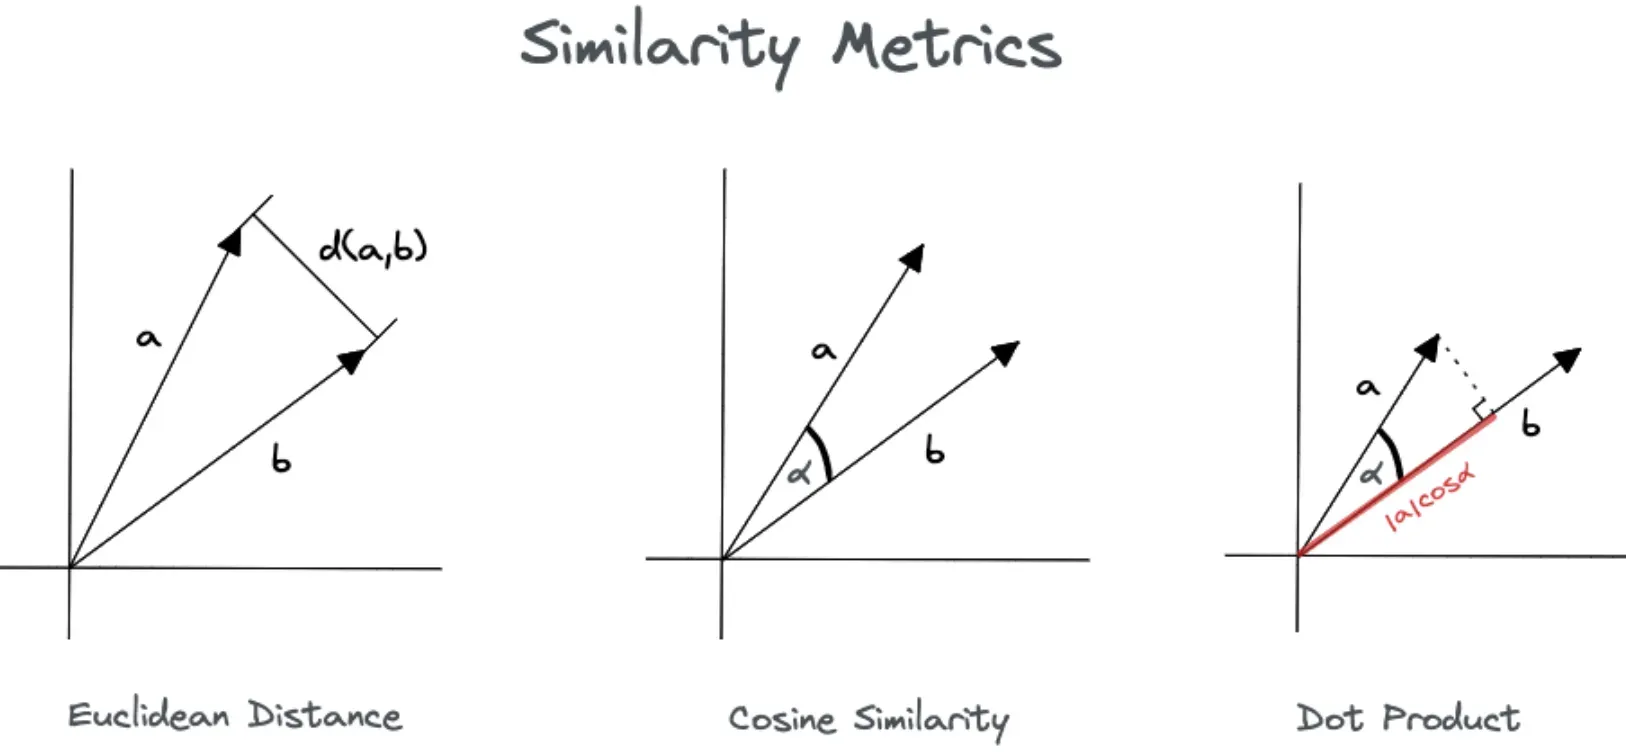

In [ ]:
from langchain_chroma import Chroma

db = Chroma(
    collection_name="rag_collection",
    embedding_function=cached_embedder,
    persist_directory=CHROMA_PATH,
    collection_metadata={"hnsw:space": "cosine"}  # 옵션: "cosine", "l2" (유클리드), "ip" (내적)
)

In [ ]:
results = db.similarity_search(query)

In [ ]:
print(f"검색된 문서 내용:\n{results[0].page_content}")

검색된 문서 내용:
Holdings Data - ARKK
As of 11/26/2025
ARKK
ARK Innovation ETF
Company Ticker CUSIP Shares Market Value ($) Weight (%)
1 TESLA INC TSLA 88160R101 2,204,438 $924,541,297.20 12.26%
2 TEMPUS AI INC TEM 88023B103 5,465,331 $419,956,034.04 5.57%
3 ROKU INC ROKU 77543R102 4,347,025 $412,445,732.00 5.47%


In [ ]:
retriever = db.as_retriever(
    search_type = "similarity_score_threshold",
    search_kwargs = {"score_threshold" : 0.4}
)

In [ ]:
results = retriever.invoke("ARKK의 Tesla 투자 비중은?")

In [ ]:
len(results)

1

In [ ]:
print(f"검색된 문서 내용:\n{results[0].page_content}")

검색된 문서 내용:
Holdings Data - ARKK
As of 11/26/2025
ARKK
ARK Innovation ETF
Company Ticker CUSIP Shares Market Value ($) Weight (%)
1 TESLA INC TSLA 88160R101 2,204,438 $924,541,297.20 12.26%
2 TEMPUS AI INC TEM 88023B103 5,465,331 $419,956,034.04 5.57%
3 ROKU INC ROKU 77543R102 4,347,025 $412,445,732.00 5.47%


In [ ]:
retriever = db.as_retriever(
    search_type = "mmr",
    search_kwargs = {"k" : 3}
)

In [ ]:
results = retriever.invoke("ARKK의 Tesla 투자 비중은?")

In [ ]:
len(results)

3

In [ ]:
results

[Document(id='8585e34f-deb8-41fe-946a-be509429ea09', metadata={'file_path': '/content/ARK_INNOVATION_ETF_ARKK_HOLDINGS.pdf', 'source': '/content/ARK_INNOVATION_ETF_ARKK_HOLDINGS.pdf', 'total_pages': 3, 'Keywords': 'HD:2025-11-26', 'CreationDate': "D:20251126070539+00'00'", 'page': 0, 'ModDate': "D:20251126070539+00'00'"}, page_content='Holdings Data - ARKK\nAs of 11/26/2025\nARKK\nARK Innovation ETF\nCompany Ticker CUSIP Shares Market Value ($) Weight (%)\n1 TESLA INC TSLA 88160R101 2,204,438 $924,541,297.20 12.26%\n2 TEMPUS AI INC TEM 88023B103 5,465,331 $419,956,034.04 5.57%\n3 ROKU INC ROKU 77543R102 4,347,025 $412,445,732.00 5.47%'),
 Document(id='c1f0bccd-83a3-4218-9e98-b22667cd9aff', metadata={'file_path': '/content/ARK_INNOVATION_ETF_ARKK_HOLDINGS.pdf', 'page': 1, 'CreationDate': "D:20251126070539+00'00'", 'Keywords': 'HD:2025-11-26', 'ModDate': "D:20251126070539+00'00'", 'total_pages': 3, 'source': '/content/ARK_INNOVATION_ETF_ARKK_HOLDINGS.pdf'}, page_content="Investors should

## Agentic RAG

In [ ]:
from langchain.chat_models import init_chat_model

model = init_chat_model("gpt-5-nano")

In [ ]:
response = model.invoke("ARKK 펀드의 Tesla 투자 비중이 어떻게 돼?")

In [ ]:
response

AIMessage(content='현재 시점의 정확한 비중은 ARK가 매일 업데이트하기 때문에 제가 바로 숫자를 알려드리기 어렵습니다. 다만 Tesla의 ARKK 내 비중은 과거에 한 자릿수(대략 2%–9% 범위)에서 변동해 왔고, 시장 상황에 따라 달라졌습니다.\n\n가장 정확한 수치를 확인하려면 아래 방법으로 확인하실 수 있습니다:\n- ARK 공식 사이트의 ARKK Holdings 페이지로 가서 Tesla(TSLA) 항목의 비중(Weight)을 확인\n  - 링크 예: ark-funds.com/arkk\n- 같은 페이지의 Top Holdings이나 전체 보유 종목 목록에서 TSLA의 비중을 확인\n- 필요하면 Yahoo Finance, Morningstar 등 ETF 정보 사이트에서도 일간 보유 비중을 확인 가능\n\n원하시면 특정 날짜(예: 최근 한 달, 최근 분기 말 등)의 수치를 찾아 비교해 드리겠습니다. 원하시는 날짜를 알려주시면 그 날짜 기준으로 정리해 드릴게요.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 1835, 'prompt_tokens': 21, 'total_tokens': 1856, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 1600, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D3aDm7wCMzSe5E6YGg8QUy1ClYZCj', 'servi

In [ ]:
from langchain.tools import tool

@tool
def search_portfolio(query: str):
    """
    ARKK ETF의 포트폴리오 정보를 검색할 때 사용합니다.
    특정 기업의 보유 비중, 주식 수, 가치 등을 찾을 때 이 도구를 호출하세요.
    """
    docs = retriever.invoke(query)
    return "\n".join([doc.page_content for doc in docs])

In [ ]:
tools = [search_portfolio]

In [ ]:
from langchain.agents import create_agent

agent = create_agent(
    model="gpt-5",
    tools=tools,
)

In [ ]:
response = agent.invoke(
    {"messages": [{"role": "user", "content": "ARKK 펀드의 Tesla 투자 비중이 어떻게 돼?"}]},
)

In [ ]:
response['messages'][-1].content

'2025-11-26 기준 ARK Innovation ETF(ARKK)의 Tesla(TSLA) 비중은 약 12.26%입니다. 비중은 일별로 변동될 수 있는데, 최신 수치를 확인해드릴까요?'

In [ ]:
response

{'messages': [HumanMessage(content='ARKK 펀드의 Tesla 투자 비중이 어떻게 돼?', additional_kwargs={}, response_metadata={}, id='0394b975-5540-446a-8af4-153314eb99fd'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 219, 'prompt_tokens': 174, 'total_tokens': 393, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 192, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D3aHkQuz7CzgtvVj1kN1auKozuerQ', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019c0d21-a834-7622-9739-6159c0820d7a-0', tool_calls=[{'name': 'search_portfolio', 'args': {'query': 'ARKK Tesla weight'}, 'id': 'call_DQNhVQUiEVrX46mqOCcq8vcT', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 174, '

In [ ]:
response["messages"][-1].content

'2025-11-26 기준 ARK Innovation ETF(ARKK)의 Tesla(TSLA) 비중은 약 12.26%입니다. 비중은 일별로 변동될 수 있는데, 최신 수치를 확인해드릴까요?'

In [ ]:
response = agent.invoke(
    {"messages": [{"role": "user", "content": "ARKK 펀드의 Amazon 투자 비중이 어떻게 되고, 총 몇 주를 매수했나요?"}]},
)

In [ ]:
response["messages"][-1].content

'다음은 ARKK의 Amazon(AMZN) 보유 현황입니다 (기준일: 2025-11-26):\n- 포트폴리오 내 비중: 1.73%\n- 보유 주식 수: 568,449주\n- 시가 평가액: $130,555,681.83\n\n참고: 위 주식 수는 현재 보유량을 의미하며, 역사적 누적 매수량은 아닙니다. 보유 종목과 비중은 수시로 변경될 수 있습니다. 최신 기준일 자료가 필요하시면 알려주세요.'

## Hybrid Search

### BM25

In [ ]:
!pip install -qU rank_bm25

In [ ]:
from langchain_community.retrievers import BM25Retriever

# 텍스트 리스트 준비
retriever = BM25Retriever.from_texts(["foo", "bar", "world", "hello", "foo bar"])

In [ ]:
# 'foo'와 가장 연관성 높은 문서 검색
result = retriever.invoke("foo")

In [ ]:
result

[Document(metadata={}, page_content='foo'),
 Document(metadata={}, page_content='foo bar'),
 Document(metadata={}, page_content='hello'),
 Document(metadata={}, page_content='world')]

In [ ]:
from langchain_core.documents import Document

retriever = BM25Retriever.from_documents([
    Document(page_content="사과는"),
    Document(page_content="사과합니다."),
    Document(page_content="사과 팝니다."),
])

In [ ]:
result = retriever.invoke("사과드립니다.")

In [ ]:
result

[Document(metadata={}, page_content='사과 팝니다.'),
 Document(metadata={}, page_content='사과합니다.'),
 Document(metadata={}, page_content='사과는')]

### Kiwi

In [ ]:
!pip install -qU kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 MB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 21.8 MB/s eta 0:00:00


In [ ]:
from kiwipiepy import Kiwi

# 1. Kiwi 형태소 분석기 준비
kiwi = Kiwi()

# 전처리 함수 정의 (명사, 동사, 형용사 등 의미 있는 품사만 추출하거나 전체를 추출)
def korean_tokenizer(text):
    # kiwi.tokenize()는 토큰 정보를 반환하므로, 거기서 단어 형태(form)만 추출
    return [token.form for token in kiwi.tokenize(text)]

In [ ]:
korean_tokenizer("사과드립니다.")

['사과', '드리', 'ᆸ니다', '.']

In [ ]:
# 2. 문서 데이터
docs = [
    Document(page_content="RAG 시스템을 구축할 때는 검색기의 성능이 매우 중요합니다."),
    Document(page_content="한국어는 교착어이므로 형태소 분석이 필수적입니다."),
    Document(page_content="BM25는 키워드 기반의 희소 검색(Sparse Retrieval) 알고리즘입니다."),
    Document(page_content="벡터 검색은 문맥을 잘 파악하지만 고유명사 검색에 약할 수 있습니다."),
]

In [ ]:
# 3. BM25 검색기 생성 (preprocess_func에 한국어 토크나이저 주입)
retriever = BM25Retriever.from_documents(
    docs,
    preprocess_func=korean_tokenizer
)

In [ ]:
result = retriever.invoke("형태소 분석은 왜 해야하나요?")
print(f"검색 결과: {result[0].page_content}")

검색 결과: 한국어는 교착어이므로 형태소 분석이 필수적입니다.
